# Advanced Agentic RAG with LangGraph

**A portfolio project showcasing intelligent, adaptive retrieval pipelines**

This system demonstrates production-grade RAG architecture patterns:

- **Dynamic strategy selection** - Semantic, keyword, or hybrid retrieval based on query analysis
- **Quality-driven self-correction** - Automatic query rewrites when retrieval quality is insufficient
- **Multi-stage reranking** - CrossEncoder (top-10) + LLM-as-judge (top-6) for precision
- **NLI-based hallucination detection** - Claim decomposition with cross-encoder verification
- **Multi-agent parallel retrieval** - Query decomposition with parallel workers for complex questions

**Architecture**: 7-node StateGraph with distributed intelligence (no central orchestrator)  
**Framework**: LangChain 1.0 & LangGraph 1.0  
**Pattern**: Dynamic Planning and Execution Agents

In [1]:
# Setup & Imports
import os
from dotenv import load_dotenv
load_dotenv()

# All RAG graph variants
from advanced_agentic_rag_langgraph.variants import (
    basic_rag_graph,
    intermediate_rag_graph,
    advanced_rag_graph,
    multi_agent_rag_graph,
)
from advanced_agentic_rag_langgraph.core import setup_retriever

print("RAG variants loaded:")
print("  - basic_rag_graph: Simplest RAG (semantic search only)")
print("  - intermediate_rag_graph: Query expansion + hybrid + reranking")
print("  - advanced_rag_graph: Full agentic RAG with self-correction")
print("  - multi_agent_rag_graph: Parallel retrieval workers")

RAG variants loaded:
  - basic_rag_graph: Simplest RAG (semantic search only)
  - intermediate_rag_graph: Query expansion + hybrid + reranking
  - advanced_rag_graph: Full agentic RAG with self-correction
  - multi_agent_rag_graph: Parallel retrieval workers


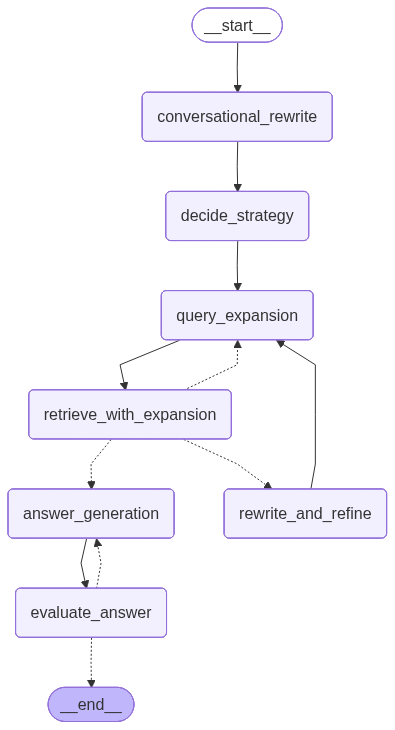

In [2]:
# Architecture Diagram - LangGraph Mermaid Visualization
from IPython.display import Image

# Render the Advanced RAG graph structure
Image(advanced_rag_graph.get_graph().draw_mermaid_png())

## Routing Logic (What the Diagram Doesn't Show)

The graph visualization shows nodes and edges, but the **conditional routing logic** is where the "intelligence" lives:

### `route_after_retrieval` - Quality-Based Branching
```python
if quality >= 0.6:
    return "answer_generation"  # Good enough - proceed

if attempts >= 2:
    return "answer_generation"  # Max attempts - proceed anyway

if ("off_topic" in issues or "wrong_domain" in issues) and (attempts == 1):
    return "query_expansion"    # Early strategy switch
else:
    return "rewrite_and_refine" # Semantic rewrite
```

### `route_after_evaluation` - Answer Quality Gate
```python
if is_refusal:
    return END  # LLM refused - terminal state

if is_answer_sufficient:
    return END

if generation_attempts < 2:
    return "answer_generation"  # Retry with feedback
else:
    return END  # Max attempts reached
```

### Key Design Principles
- **Fix generation with generation** - Don't re-retrieve for generation problems
- **Single correction cycle** - Research shows diminishing returns after first retry
- **Adaptive thresholds** - Lower quality bar (50%) when retrieval is poor

In [3]:
# Initialize Retriever (one-time setup)
# This loads 10 research papers and creates the vector store
setup_retriever()
print("\nRetriever initialized with 10 research papers (924 chunks)")
print("Papers include: Transformers, BERT, ViT, DDPM, CLIP, U-Net, WGAN-GP, Consistency Models")


LOADING ALL PDFS FROM docs/

Found 10 PDF file(s):
  1. AN IMAGE IS WORTH 16X16 WORDS - TRANSFORMERS FOR IMAGE RECOGNITION AT SCALE.pdf (3.6 MB)
  2. Attention Is All You Need.pdf (2.1 MB)
  3. BERT - Pre-training of Deep Bidirectional Transformers for Language Understanding.pdf (0.7 MB)
  4. Consistency Models - faster alternative to traditional diffusion models; directly mapping noise to data.pdf (30.1 MB)
  5. Denoising Diffusion Probabilistic Models.pdf (9.8 MB)
  6. Expanding Horizons in RAG - Exploring and Extending the Limits of RAPTOR.pdf (0.6 MB)
  7. Hierarchical Text-Conditional Image Generation with CLIP Latents.pdf (40.9 MB)
  8. Improved Training of Wasserstein GANs.pdf (5.9 MB)
  9. Learning Transferable Visual Models From Natural Language Supervision.pdf (6.5 MB)
  10. U-Net - Convolutional Networks for Biomedical Image Segmentation.pdf (1.6 MB)

STEP 1: Loading full documents (no chunking)


Loading 10 PDFs as full documents (no chunking)...
Loading full document: AN 

  Pages: 22, Characters: 67,154
Loading full document: Attention Is All You Need.pdf


  Pages: 15, Characters: 39,511
Loading full document: BERT - Pre-training of Deep Bidirectional Transformers for Language Understanding.pdf
  Pages: 16, Characters: 64,131
Loading full document: Consistency Models - faster alternative to traditional diffusion models; directly mapping noise to data.pdf


  Pages: 42, Characters: 97,294
Loading full document: Denoising Diffusion Probabilistic Models.pdf


  Pages: 25, Characters: 54,041
Loading full document: Expanding Horizons in RAG - Exploring and Extending the Limits of RAPTOR.pdf
  Pages: 11, Characters: 37,149
Loading full document: Hierarchical Text-Conditional Image Generation with CLIP Latents.pdf


  Pages: 27, Characters: 56,402
Loading full document: Improved Training of Wasserstein GANs.pdf


  Pages: 20, Characters: 41,584
Loading full document: Learning Transferable Visual Models From Natural Language Supervision.pdf


  Pages: 48, Characters: 224,303
Loading full document: U-Net - Convolutional Networks for Biomedical Image Segmentation.pdf
  Pages: 8, Characters: 19,623

Loaded 10 full documents, 701,192 total characters

STEP 2: Profiling documents with LLM


DOCUMENT PROFILING
Profiling 10 documents...



Document 1 (doc_0):
  Type: conference_paper
  Technical Density: 0.80
  Reading Level: advanced
  Domain: computer_vision, transformers, deep_learning
  Best Strategy: hybrid



Document 2 (doc_1):
  Type: conference_paper
  Technical Density: 0.90
  Reading Level: advanced
  Domain: machine_learning, deep_learning, nlp
  Best Strategy: hybrid



Document 3 (doc_2):
  Type: conference_paper
  Technical Density: 0.90
  Reading Level: advanced
  Domain: nlp, transformers, deep_learning
  Best Strategy: hybrid



Document 4 (doc_3):
  Type: conference_paper
  Technical Density: 0.90
  Reading Level: advanced
  Domain: machine_learning, generative_models, diffusion_models
  Best Strategy: hybrid



Document 5 (doc_4):
  Type: conference_paper
  Technical Density: 0.90
  Reading Level: advanced
  Domain: machine_learning, deep_learning, computer_vision
  Best Strategy: hybrid



Document 6 (doc_5):
  Type: conference_paper
  Technical Density: 0.80
  Reading Level: advanced
  Domain: nlp, retrieval_augmented_generation, machine_learning
  Best Strategy: hybrid



Document 7 (doc_6):
  Type: conference_paper
  Technical Density: 0.80
  Reading Level: advanced
  Domain: computer_vision, machine_learning, generative_models
  Best Strategy: hybrid



Document 8 (doc_7):
  Type: conference_paper
  Technical Density: 0.90
  Reading Level: advanced
  Domain: machine_learning, generative_adversarial_networks, deep_learning
  Best Strategy: hybrid



Document 9 (doc_8):
  Type: conference_paper
  Technical Density: 0.90
  Reading Level: advanced
  Domain: computer_vision, natural_language_processing, machine_learning
  Best Strategy: hybrid



Document 10 (doc_9):
  Type: conference_paper
  Technical Density: 0.80
  Reading Level: advanced
  Domain: computer_vision, deep_learning, biomedical_image_segmentation
  Best Strategy: hybrid

CORPUS STATISTICS
Total Documents: 10
Average Technical Density: 0.86

Document Types:
  - conference_paper: 10 (100.0%)

Domain Distribution:
  - computer_vision: 5
  - transformers: 2
  - deep_learning: 6
  - machine_learning: 7
  - nlp: 3
  - generative_models: 2
  - diffusion_models: 1
  - retrieval_augmented_generation: 1
  - generative_adversarial_networks: 1
  - natural_language_processing: 1
  - biomedical_image_segmentation: 1

Percentage with Code: 50.0%
Percentage with Math: 70.0%

STEP 3: Chunking documents

Created 924 chunks from 10 documents

CORPUS STATISTICS
Total documents: 10
Total chunks: 924
Avg technical density: 0.86
Document types: {'conference_paper': 10}
Has code: 50%
Has math: 70%




Retriever initialized with 10 research papers (924 chunks)
Papers include: Transformers, BERT, ViT, DDPM, CLIP, U-Net, WGAN-GP, Consistency Models


## 4-Tier Architecture Comparison

Each tier adds capabilities while using the **same budget model tier** (GPT-4o-mini) to isolate architectural improvements from model quality:

| Tier | Features | Key Capabilities |
|------|----------|------------------|
| **Basic** | 1 | Semantic search only, direct LLM generation |
| **Intermediate** | 5 | + Query expansion, hybrid retrieval, RRF fusion, reranking |
| **Advanced** | 17 | + Strategy selection, quality gates, self-correction loops |
| **Multi-Agent** | 20 | + Query decomposition, parallel workers, merge reranking |

### Feature Progression
- **Basic**: Pure semantic similarity - works well for simple, direct questions
- **Intermediate**: Query variations improve recall, reranking improves precision
- **Advanced**: Adapts strategy based on query type, retries on poor results
- **Multi-Agent**: Decomposes complex questions, retrieves in parallel, merges results

In [4]:
# Run 4-Tier Comparison
test_query = "Explain the complete forward pass through the Transformer encoder, including all sub-layers and their connections."

graphs = {
    "Basic": basic_rag_graph,
    "Intermediate": intermediate_rag_graph,
    "Advanced": advanced_rag_graph,
    "Multi-Agent": multi_agent_rag_graph,
}

print(f"Query: {test_query}")
print("="*80)

results = {}
for name, graph in graphs.items():
    print(f"\nRunning {name} RAG...")
    
    initial_state = {
        "user_question": test_query,
        "baseline_query": test_query,
        "messages": [],
        "retrieved_docs": [],
        "retrieval_attempts": 0,
        "query_expansions": [],
        "sub_agent_results": [],
    }
    config = {"configurable": {"thread_id": f"demo-{name.lower().replace('-', '_')}"}}
    
    result = graph.invoke(initial_state, config=config)
    results[name] = result
    
    # Show progress
    quality = result.get("retrieval_quality_score", 0) or 0
    ground = result.get("groundedness_score", 0) or 0
    print(f"  Retrieval Quality: {quality:.0%} | Groundedness: {ground:.0%}")

print("\n" + "="*80)
print("Comparison complete!")

Query: Explain the complete forward pass through the Transformer encoder, including all sub-layers and their connections.

Running Basic RAG...



BASIC RETRIEVAL
Strategy: semantic only (vector similarity)
Top-K: 4 chunks (no reranking)
Retrieved: 4 documents

All 4 chunk IDs (rank order):
  1. Attention Is All You Need.pdf_chunk_10
  2. Attention Is All You Need.pdf_chunk_17
  3. Attention Is All You Need.pdf_chunk_8
  4. AN IMAGE IS WORTH 16X16 WORDS - TRANSFORMERS FOR IMAGE RECOGNITION AT SCALE.pdf_chunk_36




ANSWER GENERATION
Answer length: 3715 chars
Context docs: 4

  Retrieval Quality: 0% | Groundedness: 0%

Running Intermediate RAG...



QUERY EXPANSION
Original: Explain the complete forward pass through the Transformer encoder, including all sub-layers and their connections.
Generated 4 variations




HYBRID RETRIEVAL WITH RRF FUSION
Strategy: hybrid (always)
Query variants: 4
Total retrievals: 48
Unique docs after RRF: 19

All 19 chunk IDs (RRF scores):
  1. Attention Is All You Need.pdf_chunk_10 (0.0656)
  2. Attention Is All You Need.pdf_chunk_17 (0.0640)
  3. AN IMAGE IS WORTH 16X16 WORDS - TRANSFORMERS FOR IMAGE RECOGNITION AT SCALE.pdf_chunk_36 (0.0623)
  4. AN IMAGE IS WORTH 16X16 WORDS - TRANSFORMERS FOR IMAGE RECOGNITION AT SCALE.pdf_chunk_13 (0.0618)
  5. AN IMAGE IS WORTH 16X16 WORDS - TRANSFORMERS FOR IMAGE RECOGNITION AT SCALE.pdf_chunk_10 (0.0611)
  6. Attention Is All You Need.pdf_chunk_8 (0.0609)
  7. Attention Is All You Need.pdf_chunk_6 (0.0607)
  8. Attention Is All You Need.pdf_chunk_11 (0.0446)
  9. Attention Is All You Need.pdf_chunk_18 (0.0439)
  10. Hierarchical Text-Conditional Image Generation with CLIP Latents.pdf_chunk_28 (0.0421)
  11. AN IMAGE IS WORTH 16X16 WORDS - TRANSFORMERS FOR IMAGE RECOGNITION AT SCALE.pdf_chunk_76 (0.0290)
  12. AN IMAGE IS WOR


CROSSENCODER RERANKING
Input: 19 documents

Chunk IDs sent to reranking (top-15):
  1. Attention Is All You Need.pdf_chunk_10
  2. Attention Is All You Need.pdf_chunk_17
  3. AN IMAGE IS WORTH 16X16 WORDS - TRANSFORMERS FOR IMAGE RECOGNITION AT SCALE.pdf_chunk_36
  4. AN IMAGE IS WORTH 16X16 WORDS - TRANSFORMERS FOR IMAGE RECOGNITION AT SCALE.pdf_chunk_13
  5. AN IMAGE IS WORTH 16X16 WORDS - TRANSFORMERS FOR IMAGE RECOGNITION AT SCALE.pdf_chunk_10
  6. Attention Is All You Need.pdf_chunk_8
  7. Attention Is All You Need.pdf_chunk_6
  8. Attention Is All You Need.pdf_chunk_11
  9. Attention Is All You Need.pdf_chunk_18
  10. Hierarchical Text-Conditional Image Generation with CLIP Latents.pdf_chunk_28
  ... and 5 more

Output: 4 documents after CrossEncoder reranking

Final chunk IDs (after CrossEncoder reranking):
  1. Attention Is All You Need.pdf_chunk_10 (score: 3.7265)
  2. Attention Is All You Need.pdf_chunk_18 (score: 2.0610)
  3. Attention Is All You Need.pdf_chunk_11 (score: 0


ANSWER GENERATION
Answer length: 3073 chars
Context docs: 4

  Retrieval Quality: 0% | Groundedness: 0%

Running Advanced RAG...



STRATEGY SELECTION
Query: Explain the complete forward pass through the Transformer encoder, including all sub-layers and their connections.
Selected: SEMANTIC
Confidence: 95%
Reasoning: The user is seeking a detailed explanation of the forward pass through the Transformer encoder, which indicates a desire for conceptual understanding and an in-depth explanation of the components involved. This aligns with the semantic search strengths, as it can provide content that explains the 'how' and 'what' of the Transformer encoder's sub-layers and their connections. Exact matching is less critical here, as the user is looking for a comprehensive understanding rather than specific terms or identifiers. Given the technical nature of the corpus, which is focused on deep learning and transformers, a semantic approach will effectively retrieve relevant explanatory content.
Note: Query optimization will happen in query_expansion_node




STRATEGY-SPECIFIC QUERY OPTIMIZATION
Strategy: semantic
Original query: Explain the complete forward pass through the Transformer encoder, including all sub-layers and their connections.
Optimized query: Provide a detailed overview of the forward pass process within the Transformer encoder, highlighting the various sub-layers, their interconnections, and the underlying principles involved.




EXPANSION DECISION
Query: Provide a detailed overview of the forward pass process within the Transformer encoder, highlighting the various sub-layers, their interconnections, and the underlying principles involved.
LLM decision: EXPAND query
Reasoning: The query is complex and involves multiple concepts related to the Transformer encoder, such as 'forward pass process', 'sub-layers', 'interconnections', and 'underlying principles'. Expanding this query into variations can help capture different terminologies and phrasing that users might employ when seeking information on this topic, thus improving retrieval effectiveness.




QUERY EXPANDED
Optimized query: Provide a detailed overview of the forward pass process within the Transformer encoder, highlighting the various sub-layers, their interconnections, and the underlying principles involved.
Expansions: ['Explain the technical implementation of the forward pass in the Transformer encoder, detailing the sub-layers involved, their interconnections, and the mechanisms that drive their functionality.', 'Discuss the practical applications and use cases of the forward pass process in the Transformer encoder, emphasizing how its various sub-layers and connections contribute to real-world tasks.', 'Describe the underlying concepts and principles that govern the forward pass within the Transformer encoder, focusing on the relationships between sub-layers and the foundational ideas that support their operation.']


RETRIEVAL EXECUTION START
Using 4 query expansion(s)
Expansions generated from: retrieval_query
Retrieval strategy: semantic




RRF MULTI-QUERY RETRIEVAL
Query variants: 4
Total retrievals: 60
Unique docs after RRF: 20

All 20 chunk IDs (RRF scores):
  1. Attention Is All You Need.pdf_chunk_10 (0.0656)
  2. Attention Is All You Need.pdf_chunk_17 (0.0638)
  3. Attention Is All You Need.pdf_chunk_6 (0.0637)
  4. AN IMAGE IS WORTH 16X16 WORDS - TRANSFORMERS FOR IMAGE RECOGNITION AT SCALE.pdf_chunk_36 (0.0623)
  5. Attention Is All You Need.pdf_chunk_8 (0.0620)
  6. AN IMAGE IS WORTH 16X16 WORDS - TRANSFORMERS FOR IMAGE RECOGNITION AT SCALE.pdf_chunk_13 (0.0604)
  7. AN IMAGE IS WORTH 16X16 WORDS - TRANSFORMERS FOR IMAGE RECOGNITION AT SCALE.pdf_chunk_10 (0.0591)
  8. Attention Is All You Need.pdf_chunk_5 (0.0574)
  9. Learning Transferable Visual Models From Natural Language Supervision.pdf_chunk_29 (0.0572)
  10. AN IMAGE IS WORTH 16X16 WORDS - TRANSFORMERS FOR IMAGE RECOGNITION AT SCALE.pdf_chunk_71 (0.0558)
  11. AN IMAGE IS WORTH 16X16 WORDS - TRANSFORMERS FOR IMAGE RECOGNITION AT SCALE.pdf_chunk_12 (0.0556)



Output: 4 docs after two-stage reranking

Final chunk IDs (after two-stage reranking):
  1. Attention Is All You Need.pdf_chunk_10 (score: 90.0000)
  2. AN IMAGE IS WORTH 16X16 WORDS - TRANSFORMERS FOR IMAGE RECOGNITION AT SCALE.pdf_chunk_13 (score: 80.0000)
  3. Attention Is All You Need.pdf_chunk_18 (score: 75.0000)
  4. Attention Is All You Need.pdf_chunk_11 (score: 75.0000)




ROUTER: AFTER RETRIEVAL
Quality: 70% (threshold: >=60%)
Attempts: 1/2
Issues: partial_coverage, missing_key_info
Decision: answer_generation (quality acceptable)


ANSWER GENERATION
Question: Explain the complete forward pass through the Transformer encoder, including all sub-layers and their connections.
Context size: 3524 chars
Retrieval quality: 70%
Generation attempt: 1/3




ANSWER EVALUATION (Refusal + Groundedness + Quality)
Generation attempt: 1
Retrieval quality: 70%


Refusal detection: ATTEMPTED - The assistant provided a detailed explanation of the forward pass through the Transformer encoder, including the steps involved, the sub-layers, and their connections. Although it acknowledged limitations regarding specific mathematical formulations, it still offered substantive information about the encoder's structure and functioning.


Groundedness: 88%


Quality: 65% (insufficient)
Issues: partial_answer, missing_details
Combined decision: RETRY


Routing: answer_generation (attempt 2/3)

ANSWER GENERATION
Question: Explain the complete forward pass through the Transformer encoder, including all sub-layers and their connections.
Context size: 3524 chars
Retrieval quality: 70%
Generation attempt: 2/3

RETRY MODE:
Feedback:
QUALITY ISSUES:
Problems: partial_answer, missing_details
Fix: Ensure all question parts are answered completely; Add more depth and explanation where the context provides supporting information




ANSWER EVALUATION (Refusal + Groundedness + Quality)
Generation attempt: 2
Retrieval quality: 70%


Refusal detection: ATTEMPTED - The assistant provided a detailed explanation of the forward pass through the Transformer encoder, including all sub-layers and their connections. It described the input embedding, positional encoding, encoder structure, multi-head self-attention mechanism, position-wise feed-forward network, residual connections, layer normalization, and layer stacking. This response contains substantive information and does not reflect a refusal.


Groundedness: 95%


Quality: 65% (insufficient)
Issues: partial_answer, missing_details
Combined decision: RETRY


Routing: END (max attempts reached)
  Retrieval Quality: 70% | Groundedness: 95%

Running Multi-Agent RAG...



COMPLEXITY CLASSIFICATION
Query: Explain the complete forward pass through the Transformer encoder, including all sub-layers and their connections.
Classification: COMPLEX
Reasoning: The query asks for a comprehensive explanation of the forward pass through the Transformer encoder, which involves multiple components (sub-layers) and their interactions. This requires understanding various aspects of the architecture, including attention mechanisms, normalization layers, and how they connect, making it a multi-faceted retrieval task.




QUERY DECOMPOSITION (ORCHESTRATOR)
Original: Explain the complete forward pass through the Transformer encoder, including all sub-layers and their connections.
Sub-queries (4):
  1. What are the main components of the Transformer encoder architecture?
  2. How does the self-attention mechanism work within the Transformer encoder?
  3. What are the roles of the feed-forward neural network and layer normalization in the Transformer encoder?
  4. How are the connections and data flow structured between the sub-layers in the Transformer encoder?
Reasoning: The decomposition focuses on distinct aspects of the Transformer encoder's forward pass, ensuring each sub-query addresses a specific component or mechanism without relying on the others.


ASSIGN WORKERS (Send API)
Spawning 4 parallel retrieval workers


RETRIEVAL WORKER 0
Sub-query: What are the main components of the Transformer encoder architecture?

RETRIEVAL WORKER 1
Sub-query: How does the self-attention mechanism work within the

  [Worker] Strategy: semantic (90%)


  [Worker] Strategy: semantic (90%)
  [Worker] Strategy: semantic (90%)



STRATEGY-SPECIFIC QUERY OPTIMIZATION
Strategy: semantic
Original query: What are the main components of the Transformer encoder architecture?
Optimized query: What are the essential elements and principles that define the structure and functionality of the Transformer encoder architecture?




STRATEGY-SPECIFIC QUERY OPTIMIZATION
Strategy: semantic
Original query: What are the roles of the feed-forward neural network and layer normalization in the Transformer encoder?
Optimized query: What is the significance of feed-forward neural networks and layer normalization within the context of the Transformer encoder's functionality?

  [Worker] Strategy: semantic (95%)



STRATEGY-SPECIFIC QUERY OPTIMIZATION
Strategy: semantic
Original query: How are the connections and data flow structured between the sub-layers in the Transformer encoder?
Optimized query: What is the overall structure and flow of information among the sub-layers within the Transformer encoder?




STRATEGY-SPECIFIC QUERY OPTIMIZATION
Strategy: semantic
Original query: How does the self-attention mechanism work within the Transformer encoder?
Optimized query: What is the underlying mechanism of self-attention in the context of the Transformer encoder, and how does it contribute to overall performance?



  [Worker] Retrieved 4 docs, quality: 80%, attempt: 1/2
Worker 2 complete: 4 docs, quality: 80%


  [Worker] Retrieved 4 docs, quality: 80%, attempt: 1/2
Worker 3 complete: 4 docs, quality: 80%


  [Worker] Retrieved 4 docs, quality: 85%, attempt: 1/2
Worker 0 complete: 4 docs, quality: 85%


  [Worker] Retrieved 4 docs, quality: 80%, attempt: 1/2
Worker 1 complete: 4 docs, quality: 80%

MERGE RESULTS (SYNTHESIZER)
Merging results from 4 workers
Stage 1 (RRF): 7 unique docs -> 7 candidates


Stage 2 (LLM Coverage): 7 candidates -> 6 selected
Total unique docs: 7
Multi-agent docs (in 2+ workers): 4
Top-6 selected for generation
Average quality: 81%


ANSWER GENERATION
Question: Explain the complete forward pass through the Transformer encoder, including all sub-layers and their connections.
Context size: 5456 chars
Retrieval quality: 81%
Generation attempt: 1/3




ANSWER EVALUATION
Generation attempt: 1


Groundedness: 83%


Quality: 90%
Decision: SUFFICIENT

  Retrieval Quality: 81% | Groundedness: 83%

Comparison complete!


In [5]:
# Display Comparison Results
print("="*100)
print(f"{'TIER':<15} {'STRATEGY':<12} {'DOCS':<6} {'RETR Q':<10} {'GROUND':<10} {'ANSWER PREVIEW'}")
print("="*100)

for name, result in results.items():
    strategy = result.get("retrieval_strategy", "semantic") or "semantic"
    docs = len(result.get("unique_docs_list", [])) if result.get("unique_docs_list") else "-"
    quality = result.get("retrieval_quality_score", 0) or 0
    ground = result.get("groundedness_score", 0) or 0
    answer = result.get("final_answer", "")[:60] + "..." if result.get("final_answer") else "No answer"
    
    print(f"{name:<15} {strategy:<12} {str(docs):<6} {quality:>8.0%}   {ground:>8.0%}   {answer}")

print("="*100)
print("\nKey Observations:")
print("- All tiers can answer the question, but with different retrieval approaches")
print("- Advanced tier may switch strategies or rewrite queries if initial retrieval is poor")
print("- Multi-Agent decomposes into sub-queries for comprehensive coverage")

TIER            STRATEGY     DOCS   RETR Q     GROUND     ANSWER PREVIEW
Basic           semantic     4            0%         0%   The forward pass through the Transformer encoder involves se...
Intermediate    semantic     4            0%         0%   The forward pass through the Transformer encoder involves se...
Advanced        semantic     4           70%        95%   The forward pass through the Transformer encoder involves se...
Multi-Agent     semantic     6           81%        83%   The complete forward pass through the Transformer encoder in...

Key Observations:
- All tiers can answer the question, but with different retrieval approaches
- Advanced tier may switch strategies or rewrite queries if initial retrieval is poor
- Multi-Agent decomposes into sub-queries for comprehensive coverage


## Deep Dive: Self-Correction Loops

The Advanced RAG tier implements two self-correction mechanisms:

### 1. Retrieval Correction (max 2 attempts)
When `retrieval_quality_score < 0.6`:
- **Path A (off_topic/wrong_domain)**: Switch strategy immediately (semantic <-> keyword)
- **Path B (other issues)**: Rewrite query using LLM-generated improvement suggestion

### 2. Generation Retry (max 3 attempts)
When answer fails quality evaluation:
- Regenerate with combined feedback (quality issues + hallucination warnings)
- Adaptive temperature: 0.3 (first retry), 0.7 (second retry)

### Example Trace
```
Attempt 1: semantic search -> 45% quality (partial_coverage detected)
  -> Rewrite: "What are transformer encoders?" -> "Detailed architecture of transformer encoder layers"
Attempt 2: semantic search -> 72% quality (sufficient)
  -> Generate answer
  -> Evaluation: 85% groundedness, 80% quality -> SUFFICIENT
```

### Why Single Correction Cycle?
Research (CRAG, Self-RAG) shows diminishing returns after the first correction. The architecture accepts imperfect retrieval rather than looping indefinitely.

In [6]:
# Self-Correction Example
# This query might trigger self-correction due to domain ambiguity

correction_query = "How do attention mechanisms differ between NLP and vision applications?"

print(f"Query: {correction_query}")
print("="*80)
print("\nRunning Advanced RAG with potential self-correction...\n")

initial_state = {
    "user_question": correction_query,
    "baseline_query": correction_query,
    "messages": [],
    "retrieved_docs": [],
    "retrieval_attempts": 0,
    "query_expansions": [],
}
config = {"configurable": {"thread_id": "demo-selfcorrect"}}

result = advanced_rag_graph.invoke(initial_state, config=config)

# Display self-correction trace
print("EXECUTION TRACE")
print("-"*40)
print(f"Retrieval Attempts: {result.get('retrieval_attempts', 1)}")
print(f"Strategy Used: {result.get('retrieval_strategy', 'semantic')}")

if result.get('strategy_changed'):
    print(f"Strategy Changed: Yes")
    print(f"  Reason: {result.get('strategy_switch_reason', 'N/A')}")

quality = result.get('retrieval_quality_score', 0) or 0
print(f"Final Retrieval Quality: {quality:.0%}")

if result.get('retrieval_quality_issues'):
    print(f"Issues Detected: {', '.join(result['retrieval_quality_issues'])}")

if result.get('retrieval_improvement_suggestion'):
    print(f"Improvement Suggestion: {result['retrieval_improvement_suggestion'][:80]}...")

print(f"\nGeneration Attempts: {result.get('generation_attempts', 1)}")
print(f"Groundedness: {(result.get('groundedness_score', 0) or 0):.0%}")
print(f"Answer Sufficient: {result.get('is_answer_sufficient', True)}")

print("\n" + "="*80)
print("ANSWER (first 500 chars):")
print("-"*40)
print(result.get('final_answer', 'No answer')[:500] + "...")

Query: How do attention mechanisms differ between NLP and vision applications?

Running Advanced RAG with potential self-correction...




STRATEGY SELECTION
Query: How do attention mechanisms differ between NLP and vision applications?
Selected: HYBRID
Confidence: 90%
Reasoning: The user is seeking a comparison of attention mechanisms in two different domains (NLP and vision), which indicates a need for both conceptual understanding (how they differ) and specific terms (attention mechanisms in both contexts). This makes a hybrid approach optimal, as it allows for retrieving content that explains the differences while also ensuring that the specific terms related to attention mechanisms in both NLP and vision are accurately matched.
Note: Query optimization will happen in query_expansion_node




STRATEGY-SPECIFIC QUERY OPTIMIZATION
Strategy: hybrid
Original query: How do attention mechanisms differ between NLP and vision applications?
Optimized query: Attention mechanisms in NLP versus vision applications: key differences, implementations, and use cases




EXPANSION DECISION
Query: Attention mechanisms in NLP versus vision applications: key differences, implementations, and use cases
LLM decision: EXPAND query
Reasoning: The query addresses a complex topic with multiple facets (attention mechanisms in NLP and vision), which can be phrased in various ways. Expanding the query into variations can help capture different terminologies and perspectives, enhancing retrieval effectiveness.




QUERY EXPANDED
Optimized query: Attention mechanisms in NLP versus vision applications: key differences, implementations, and use cases
Expansions: ['Technical implementations and mechanisms of attention mechanisms in NLP compared to vision applications: what are the key differences?', 'Practical applications and use cases of attention mechanisms in NLP and vision: how do they differ?', 'Underlying concepts and principles of attention mechanisms in NLP versus vision applications: what are the key distinctions?']


RETRIEVAL EXECUTION START
Using 4 query expansion(s)
Expansions generated from: retrieval_query
Retrieval strategy: hybrid




RRF MULTI-QUERY RETRIEVAL
Query variants: 4
Total retrievals: 56
Unique docs after RRF: 32

All 32 chunk IDs (RRF scores):
  1. Learning Transferable Visual Models From Natural Language Supervision.pdf_chunk_169 (0.0640)
  2. Attention Is All You Need.pdf_chunk_17 (0.0567)
  3. Attention Is All You Need.pdf_chunk_5 (0.0563)
  4. Attention Is All You Need.pdf_chunk_49 (0.0487)
  5. AN IMAGE IS WORTH 16X16 WORDS - TRANSFORMERS FOR IMAGE RECOGNITION AT SCALE.pdf_chunk_6 (0.0484)
  6. AN IMAGE IS WORTH 16X16 WORDS - TRANSFORMERS FOR IMAGE RECOGNITION AT SCALE.pdf_chunk_35 (0.0462)
  7. AN IMAGE IS WORTH 16X16 WORDS - TRANSFORMERS FOR IMAGE RECOGNITION AT SCALE.pdf_chunk_38 (0.0444)
  8. Learning Transferable Visual Models From Natural Language Supervision.pdf_chunk_14 (0.0318)
  9. AN IMAGE IS WORTH 16X16 WORDS - TRANSFORMERS FOR IMAGE RECOGNITION AT SCALE.pdf_chunk_5 (0.0305)
  10. Attention Is All You Need.pdf_chunk_7 (0.0296)
  11. AN IMAGE IS WORTH 16X16 WORDS - TRANSFORMERS FOR IMAGE


Output: 4 docs after two-stage reranking

Final chunk IDs (after two-stage reranking):
  1. AN IMAGE IS WORTH 16X16 WORDS - TRANSFORMERS FOR IMAGE RECOGNITION AT SCALE.pdf_chunk_41 (score: 85.0000)
  2. AN IMAGE IS WORTH 16X16 WORDS - TRANSFORMERS FOR IMAGE RECOGNITION AT SCALE.pdf_chunk_1 (score: 85.0000)
  3. AN IMAGE IS WORTH 16X16 WORDS - TRANSFORMERS FOR IMAGE RECOGNITION AT SCALE.pdf_chunk_5 (score: 85.0000)
  4. Attention Is All You Need.pdf_chunk_17 (score: 80.0000)




ROUTER: AFTER RETRIEVAL
Quality: 60% (threshold: >=60%)
Attempts: 1/2
Issues: missing_key_info, incomplete_context
Decision: answer_generation (quality acceptable)


ANSWER GENERATION
Question: How do attention mechanisms differ between NLP and vision applications?
Context size: 4049 chars
Retrieval quality: 60%
Generation attempt: 1/3




ANSWER EVALUATION (Refusal + Groundedness + Quality)
Generation attempt: 1
Retrieval quality: 60%


Refusal detection: ATTEMPTED - The assistant provided a detailed explanation of how attention mechanisms differ between NLP and vision applications, including specific implementations and challenges in both domains. While it acknowledged that the context does not cover all differences exhaustively, it still offered substantive information about the topic.


Groundedness: 100%


Quality: 65% (insufficient)
Issues: incomplete_synthesis, missing_details, partial_answer
Combined decision: RETRY


Routing: answer_generation (attempt 2/3)

ANSWER GENERATION
Question: How do attention mechanisms differ between NLP and vision applications?
Context size: 4049 chars
Retrieval quality: 60%
Generation attempt: 2/3

RETRY MODE:
Feedback:
QUALITY ISSUES:
Problems: incomplete_synthesis, missing_details, partial_answer
Fix: Provide more comprehensive synthesis of the relevant information; Add more depth and explanation where the context provides supporting information; Ensure all question parts are answered completely




ANSWER EVALUATION (Refusal + Groundedness + Quality)
Generation attempt: 2
Retrieval quality: 60%


Refusal detection: ATTEMPTED - The assistant provided a detailed explanation of how attention mechanisms differ between NLP and vision applications, including specific examples and references to relevant papers. This indicates that the answer contains substantive information rather than a complete refusal.


Groundedness: 100%


Quality: 65% (insufficient)
Issues: partial_answer, missing_details
Combined decision: RETRY


Routing: END (max attempts reached)
EXECUTION TRACE
----------------------------------------
Retrieval Attempts: 1
Strategy Used: hybrid
Final Retrieval Quality: 60%
Issues Detected: missing_key_info, incomplete_context
Improvement Suggestion: Rephrase to specifically ask for 'differences in attention mechanisms between NL...

Generation Attempts: 2
Groundedness: 100%
Answer Sufficient: False

ANSWER (first 500 chars):
----------------------------------------
The attention mechanisms in natural language processing (NLP) and vision applications differ primarily in their application and scaling strategies. 

In NLP, Transformers utilize multi-head attention in various ways, including encoder-decoder attention, where queries come from the decoder and keys/values from the encoder, allowing the decoder to attend to all positions in the input sequence. Additionally, self-attention layers in both th

## Evaluation Metrics Summary

Golden dataset evaluation (10 hard questions, budget model tier):

| Tier | F1@6 | Groundedness | Factual Accuracy |
|------|------|--------------|------------------|
| Basic | 29.0% | 99.0% | 92.1% |
| Intermediate | 27.0% | 97.5% | 88.2% |
| Advanced | 30.1% | 95.6% | 77.5% |
| Multi-Agent | 38.8% | 97.6% | 84.0% |

### Key Insights

**Retrieval Quality (F1@6)**
- Multi-Agent shows +30% improvement over Basic on complex queries
- Query decomposition helps find relevant documents across multiple aspects

**Groundedness** (% of claims supported by context)
- All tiers maintain >95% groundedness
- NLI-based detection catches unsupported claims

**Architecture Value Proposition**
- Budget tier (GPT-4o-mini) demonstrates that architecture matters
- Self-correction loops improve robustness, not just metrics
- Higher tiers provide better answers on hard questions

### When to Use Each Tier
- **Basic**: Simple factual lookups, low latency requirements
- **Intermediate**: Production workloads with quality requirements
- **Advanced**: Complex domains where query understanding matters
- **Multi-Agent**: Research synthesis, multi-faceted questions

In [7]:
# Display Latest Test Results
import json
from pathlib import Path

# Try to load latest evaluation results
eval_dir = Path("evaluation")
latest_file = eval_dir / "architecture_comparison_results_hard_latest.json"

if latest_file.exists():
    with open(latest_file) as f:
        eval_data = json.load(f)
    
    print("LATEST EVALUATION RESULTS")
    print("="*60)
    print(f"Dataset: {eval_data.get('config', {}).get('dataset', 'hard')}")
    print(f"Model Tier: {eval_data.get('config', {}).get('model_tier', 'budget')}")
    print()
    
    for tier, metrics in eval_data.get('summary', {}).items():
        if isinstance(metrics, dict):
            f1 = metrics.get('f1_at_k', 0) * 100
            ground = metrics.get('groundedness', 0) * 100
            fact = metrics.get('factual_accuracy', 0) * 100
            print(f"{tier:<15} F1@6: {f1:>5.1f}%  Ground: {ground:>5.1f}%  Factual: {fact:>5.1f}%")
else:
    print("No evaluation results found. Run test_architecture_comparison.py to generate.")
    print("\nExpected metrics (from golden dataset):")
    print("  Basic:        F1@6: 29.0%  Ground: 99.0%")
    print("  Intermediate: F1@6: 27.0%  Ground: 97.5%")
    print("  Advanced:     F1@6: 30.1%  Ground: 95.6%")
    print("  Multi-Agent:  F1@6: 38.8%  Ground: 97.6%")

LATEST EVALUATION RESULTS
Dataset: hard
Model Tier: budget



## Conclusion & Next Steps

### Key Takeaways

1. **Architecture > Model Size** - The graph structure provides value independent of model quality. Budget tier demonstrates the RAG intelligence; higher tiers add polish.

2. **Distributed Decision-Making** - No central orchestrator. The StateGraph itself is the agent, with routing functions encoding planning logic.

3. **Quality-Driven Flow** - Every routing point evaluates results and decides next action. Poor retrieval triggers correction; poor generation triggers retry.

4. **Multi-Agent for Complexity** - Query decomposition with parallel workers significantly improves F1@6 on complex, multi-faceted questions.

### Source Code

```
src/advanced_agentic_rag_langgraph/
    core/              # State, retriever, model config
    orchestration/     # Main graph, nodes, routing
    retrieval/         # Strategy selection, reranking
    evaluation/        # Quality assessment, NLI detection
    variants/          # Basic, Intermediate, Advanced, Multi-Agent
```

### How to Extend

1. **Add new retrieval strategies** - Implement in `retrieval/strategy_selection.py`
2. **Custom quality metrics** - Extend `evaluation/retrieval_quality.py`
3. **Different document types** - Modify `core/setup_retriever.py`
4. **Production deployment** - Add LangSmith tracing, async execution

### Related Resources

- [LangGraph Documentation](https://langchain-ai.github.io/langgraph/)
- [RAG Evaluation Guide](https://docs.langchain.com/langsmith/evaluate-rag-tutorial)
- [Build a Custom RAG Agent](https://docs.langchain.com/oss/python/langgraph/agentic-rag)